In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
from picconfig import showcasepath, outputpath
dat = pd.read_csv(showcasepath)[['FieldID','Class_top','Class_detail','Priority']]

In [3]:
Classes = ['Baseline characteristics', 'Life', 'Measures', 'Natural and social environment']

In [4]:
def drawbarplot(classnumber, ax):
    result = dat[dat['Class_top']==Classes[classnumber]].groupby('Class_detail')['Priority'].value_counts()
    names = np.unique(np.array([item[0] for item in result.index.to_numpy()]))
    df = []
    for name in names:
        temp = []
        for priority in [1,2,3]:
            if (name, priority) in result.index:
                temp.append(result.loc[(name, priority)])
            else:
                temp.append(0)
        df.append(temp)
    df = np.array(df)
    index = np.argsort(df.sum(axis=1))
    df = df[index,:]
    names = names[index]
    colors = ['#403990','#80A6E2','#FBDD85','#F46F43','#CF3D3E']
    cm = LinearSegmentedColormap.from_list('Nature', colors, N=5)
    size = 12
    # plt.figure(dpi=500,figsize=(10, 3))
    bars=ax.barh(names, df[:,0], label='essential', left=np.zeros(df.shape[0]), color=cm(4), edgecolor="#ffffff")
    for j,bar in enumerate(bars):
        if df[j,0]!=0:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, 
                    f'{int(df[j,0])}', ha='center', va='center', color='black',fontsize=size)
    bars=ax.barh(names, df[:,1], label='detailed', left=df[:,0], color=cm(2), edgecolor="#ffffff")
    for j,bar in enumerate(bars):
        if df[j,1]!=0:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, 
                    f'{int(df[j,1])}', ha='center', va='center', color='black',fontsize=size)
    bars=ax.barh(names, df[:,2], label='minor', left=df[:,0] + df[:,1], color=cm(0), edgecolor="#ffffff")
    for j,bar in enumerate(bars):
        if df[j,2]!=0:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, 
                    f'{int(df[j,2])}', ha='center', va='center', color='black',fontsize=size)
    # ax.set_yticks(fontsize=14)
    ax.tick_params(axis='y', labelsize=14)
    plt.xticks([])
    plt.xlim(0,45)
    # ax=plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.set_title(Classes[classnumber], fontsize=18)

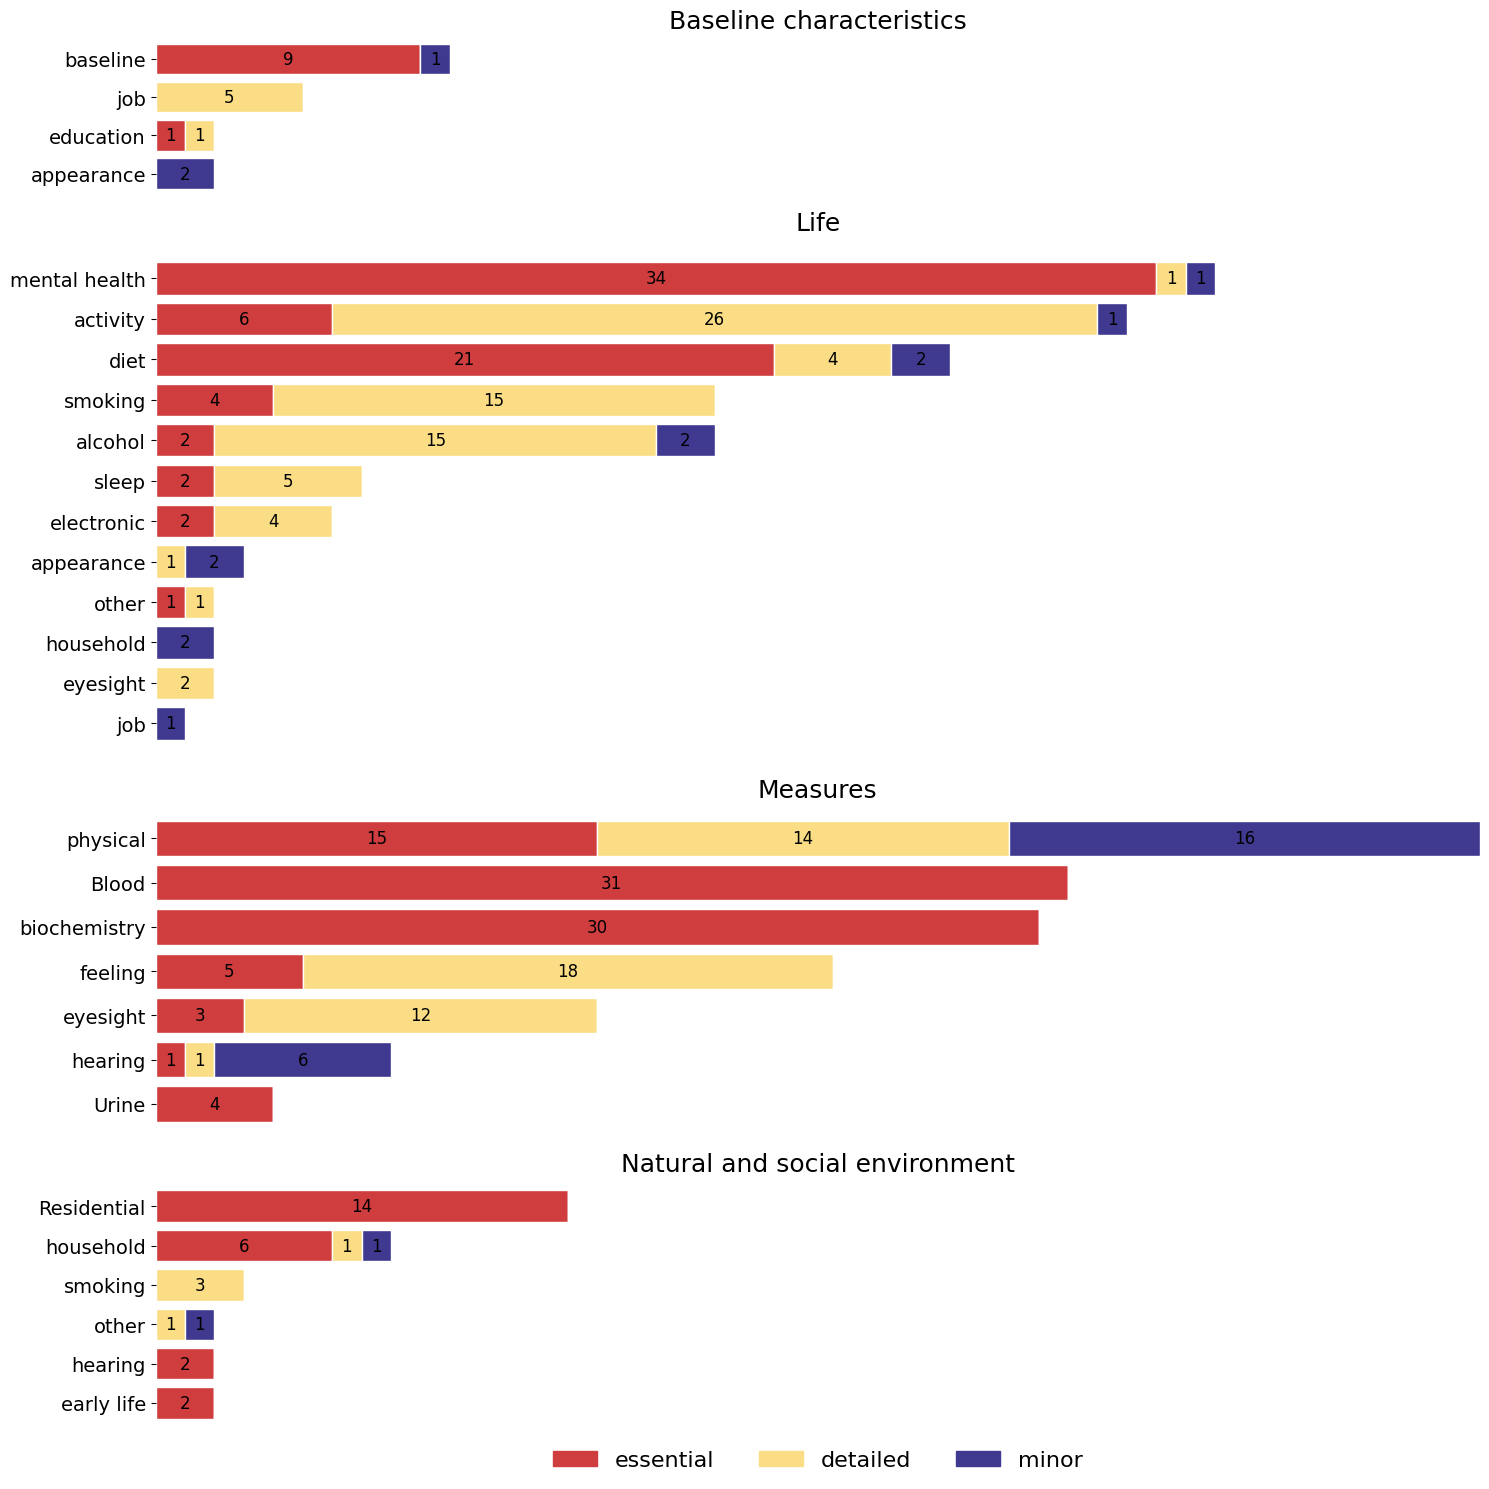

In [5]:
colors = ['#403990','#80A6E2','#FBDD85','#F46F43','#CF3D3E']
cm = LinearSegmentedColormap.from_list('Nature', colors, N=5)
fig, axes = plt.subplots(4, 1, sharex=True, gridspec_kw={'height_ratios': [0.7, 2.3, 1.45, 1.1]}, figsize=(15, 15))
drawbarplot(0, axes[0])
drawbarplot(1, axes[1])
drawbarplot(2, axes[2])
drawbarplot(3, axes[3])
names=['essential','detailed','minor']
legend_handles=[]
for i in range(3):
    legend_handles.append(Patch(color=cm(4-2*i), label=names[i]))
legend = plt.legend(handles=legend_handles, ncol=5,fontsize=16,loc='upper center',bbox_to_anchor=(0.5, 0))
legend.get_frame().set_linewidth(0)
legend.get_frame().set_facecolor('none') 
plt.tight_layout()
plt.savefig(outputpath + "sup_variable_summary.pdf", format="pdf", bbox_inches="tight")
plt.show()